# Glaciers as water resources: part 1 (idealized climate)

Our previous notebooks showed how to use OGGM to answer theoretical questions about glaciers, using idealized experiments: the effect of a different slope, the concept of the equilibrium line altitude, the mass balance gradient, etc. Now, how do we use OGGM to explore real glaciers? This notebook gives us some insight.

Goals of this notebook:

- prepare a model run for a real world glacier
- run simulations using different idealized climate scenarios to explore the role of glaciers as water resources
- understand the concept of "peak water"

## Setting the scene: glacier runoff and "peak water"

*"If glaciers melt, there won't be water in mountain anymore"*.

This is a sentence that we hear often from people we meet, or sometimes even in news articles. In fact, the role of glaciers in the hydrological cycle is more complex than that. In this notebook, we will explore this question using idealized climate scenarios applied to real glaciers!

Before we continue, let's have a look at the expected contribution of glaciers to local streamflow. The chart below shows an idealized scenario where climate is constant (and the glacier is in equilibrium with its climate) followed by a warming. This graph makes a few very important points, which we will explore together in this notebook.

1. When in equilibrium, a glacier does not contribute to annual runoff at all.
2. When the climate is warming, glaciers are losing mass. This water contributes to downstream runoff, and the runoff increases.
3. If climate warms even more, glaciers will continue to lose mass and become significantly smaller. When there isn't much ice left to melt each year (or when climate stabilizes), their contribution will become smaller until becoming zero again.
4. In the new equilibrium, the annual runoff is the same as before, but the seasonal contribution changed.

We will now get back to all these points together, using OGGM!

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41558-017-0049-x/MediaObjects/41558_2017_49_Fig1_HTML.jpg" width="40%">

*Graphic from [Huss & Hock (2018)](https://www.nature.com/articles/s41558-017-0049-x)*

## Setup 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
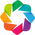

In [3]:
# One interactive plot below requires Bokeh
# The rest of the notebook works without this dependency
import holoviews as hv
hv.extension('bokeh')
import geoviews as gv
import geoviews.tile_sources as gts

In [4]:
import xarray as xr
import salem
import numpy as np
import pandas as pd

In [5]:
import oggm.cfg
from oggm import utils, workflow, tasks, graphics
from oggm_edu import run_constant_climate_with_bias

In [6]:
# OGGM options
oggm.cfg.initialize(logging_level='WARNING')
oggm.cfg.PATHS['working_dir'] = utils.gettempdir(dirname='WaterResources')
oggm.cfg.PARAMS['min_ice_thick_for_length'] = 1  # a glacier is when ice thicker than 1m

2021-05-16 18:05:23: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2021-05-16 18:05:23: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2021-05-16 18:05:23: oggm.cfg: Multiprocessing: using all available processors (N=8)
2021-05-16 18:05:23: oggm.cfg: PARAMS['min_ice_thick_for_length'] changed from `0.0` to `1`.


### Define the glacier we will play with

For this notebook we use the Hintereisferner, Austria. Some other possibilities to play with:

- Hintereisferner, Austria: RGI60-11.00897 
- Artesonraju, Peru: RGI60-16.02444
- Mera, Nepal: RGI60-15.03591
- Parlung No. 94, China: RGI60-15.11693

And virtually any glacier you can find the RGI Id from, e.g. in the [GLIMS viewer](https://www.glims.org/maps/glims)! Large glaciers may need longer simulations to see changes though. For less uncertain calibration parameters, we also recommend to pick one of the many reference glaciers [in this list](https://github.com/OGGM/oggm-sample-data/blob/master/wgms/rgi_wgms_links_20200415.csv), where we make sure that observations of mass-balance are better matched. 


Let's start with Hintereisferner first and you'll be invited to try out your favorite glacier at the end of this notebook.

In [7]:
# Hintereisferner
rgi_id = 'RGI60-11.00897'

## Preparing the glacier data

This can take up to a few minutes on the first call because of the download of the required data:

In [8]:
# We pick the elevation-bands glaciers because they run a bit faster - but they create more step changes in the area outputs
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L3-L5_files/CRU/elev_bands/qc3/pcp2.5/no_match'
gdir = workflow.init_glacier_directories([rgi_id], from_prepro_level=5, prepro_border=80, prepro_base_url=base_url)[0]

2021-05-16 18:05:23: oggm.workflow: init_glacier_directories from prepro level 5 on 1 glaciers.
2021-05-16 18:05:23: oggm.workflow: Execute entity task gdir_from_prepro on 1 glaciers


## Interactive glacier map 

A first glimpse on the glacier of interest.

*Tip: You can use the mouse to pan and zoom in the map*

In [9]:
sh = salem.transform_geopandas(gdir.read_shapefile('outlines'))
(gv.Polygons(sh).opts(fill_color=None, color_index=None) *
 gts.tile_sources['EsriImagery'] * gts.tile_sources['StamenLabels']).opts(width=800, height=500, active_tools=['pan', 'wheel_zoom'])

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .WMTS.II    :WMTS   [Longitude,Latitude]

For OGGM, glaciers are "1.5" dimensional along their flowline:

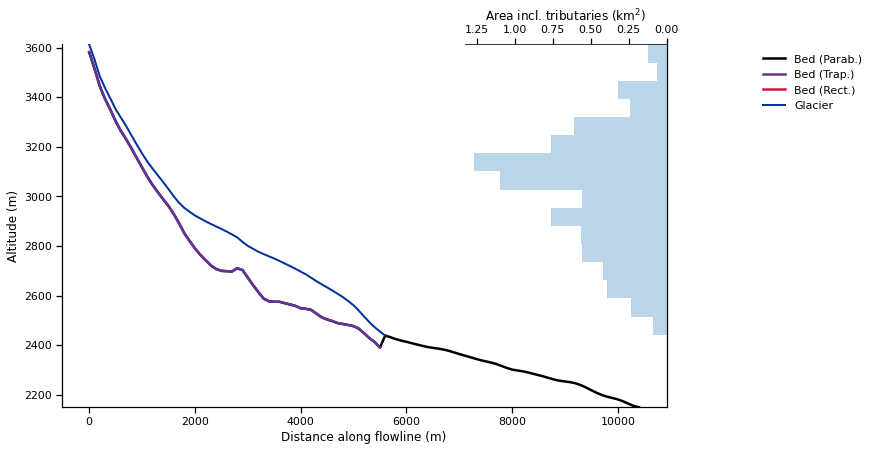

In [9]:
fls = gdir.read_pickle('model_flowlines')
graphics.plot_modeloutput_section(fls);

## Generating a glacier in equilibrium with climate 

Let's prepare a run with the `run_constant_climate_with_bias` tasks from the `oggm_edu` package. It allows us to run idealized temperature and precipitation correction scenarios in an easy way. 

First, let's decide on a temperature evolution:

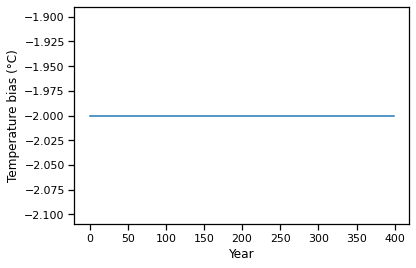

In [10]:
years = np.arange(400)
temp_bias_ts = pd.Series(years * 0. - 2, index=years)
temp_bias_ts.plot(); plt.xlabel('Year'); plt.ylabel('Temperature bias (°C)');

Not much to see here! The `temp_bias_ts` variable describes a temperature bias that will be applied to the standard climate (see below). 

Here the bias is -2° all along because we want to run a so-called "spinup" run, to let the glacier grow and make sure that our glacier is in dynamical equilibrium with its climate at the end of the simulation. Let's go: 

In [11]:
# file identifier where the model output is saved
file_id = '_spinup'

# We are using the task run_with_hydro to store hydrological outputs along with the usual glaciological outputs
tasks.run_with_hydro(gdir,  # Run on the selected glacier
                     temp_bias_ts=temp_bias_ts,  # the temperature bias to apply to the average climate
                     run_task=run_constant_climate_with_bias,  # which climate scenario? See following notebook for other examples
                     y0=2009, halfsize=10,  # Period which we will average and constantly repeat
                     store_monthly_hydro=True,  # Monthly ouptuts provide additional information
                     output_filesuffix=file_id);  # an identifier for the output file, to read it later

OK so there is quite some new material in the cell above. Let's focus on the most important points:
- we run the model for 400 years (as defined by our control temperature timeseries)
- the model runs with a constant climate averaged over 21 years (2 times `halfsize` + 1) for the period 1999-2019
- we apply a cold bias of -2°C. Indeed, Hintereisferner is in strong disequilibrium with the current climate and such a bias is need to make the glacier grow (more on this later)

Now Let's have a look at the output:

In [12]:
with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix=file_id)) as ds:
    # The last step of hydrological output is NaN (we can't compute it for this year)
    ds = ds.isel(time=slice(0, -1)).load()

There are plenty of variables in this dataset! We can list them with:

In [13]:
ds

<xarray.Dataset>
Dimensions:                       (month_2d: 12, time: 399)
Coordinates:
  * time                          (time) float64 0.0 1.0 2.0 ... 397.0 398.0
    hydro_year                    (time) int64 0 1 2 3 4 ... 394 395 396 397 398
    hydro_month                   (time) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    calendar_year                 (time) int64 -1 0 1 2 3 ... 394 395 396 397
    calendar_month                (time) int64 10 10 10 10 10 ... 10 10 10 10 10
  * month_2d                      (month_2d) int64 1 2 3 4 5 6 7 8 9 10 11 12
    calendar_month_2d             (month_2d) int64 10 11 12 1 2 3 4 5 6 7 8 9
Data variables: (12/21)
    volume_m3                     (time) float64 6.305e+08 ... 1.024e+09
    volume_bsl_m3                 (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    volume_bwl_m3                 (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    area_m2                       (time) float64 8.036e+06 ... 1.023e+07
    length_m                      (time) float64 5.6e+03 5.6e+03 ... 8.4e+03
    calving_m3                    (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                            ...
    liq_prcp_on_glacier           (time) float64 6.432e+09 ... 9.347e+09
    liq_prcp_on_glacier_monthly   (time, month_2d) float64 3.458e+07 ... 9.53...
    snowfall_off_glacier          (time) float64 4.568e+09 ... 3.106e+07
    snowfall_off_glacier_monthly  (time, month_2d) float64 4.23e+08 ... 1.815...
    snowfall_on_glacier           (time) float64 2.336e+10 ... 2.857e+10
    snowfall_on_glacier_monthly   (time, month_2d) float64 2.284e+09 ... 2.02...
Attributes:
    description:          OGGM model output
    oggm_version:         1.4.1.dev19+gd4170e8
    calendar:             365-day no leap
    creation_date:        2021-05-16 12:46:41
    water_level:          0
    glen_a:               6.774049426121393e-24
    fs:                   0
    mb_model_class:       BiasedConstantMassBalance
    mb_model_hemisphere:  nh
    mb_model_rho:         900.0
    mb_model_ys:          0
    mb_model_ye:          399

*Tip: you can click on a variable and show it's attribute with the "page" button on the right.*

The `time` and `month_2d` variables are coordinates, and the other variables are either provided as additional information (e.g. `calendar_month`, we will get back to this), or they are providing the actual data. For instance, we can plot the annual evolution of the volume and length of our glacier:

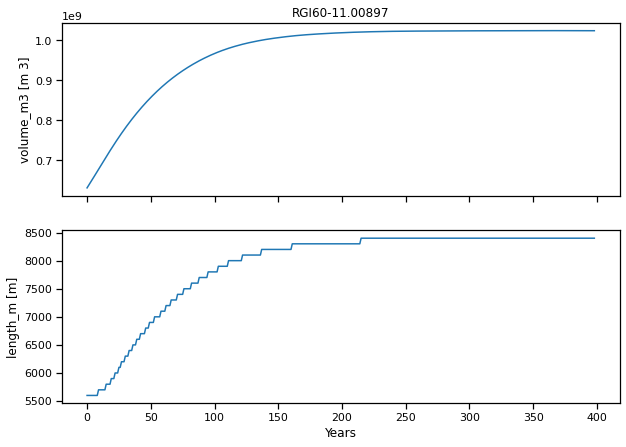

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 7), sharex=True)
ds.volume_m3.plot(ax=axs[0]);
ds.length_m.plot(ax=axs[1]);
axs[0].set_xlabel(''); axs[0].set_title(f'{rgi_id}'); axs[1].set_xlabel('Years');

The glacier grows and almost doubles its volume. After 400 years, it is in equilibrium.

This spinup simulation won't be analyzed further: let's jump to the heart of the topic: **what happens with glacier runoff when climate is warming**?

## Climate change simulation

We start by generating a temperature change scenario. We define a short period of constant temperature (at -2°C, to be consistent with above), followed by a linear increase (2.5 degrees in about 150 years) and a stabilization:

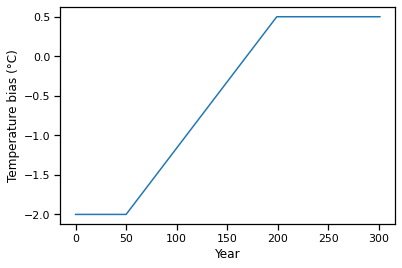

In [15]:
ny_s = 50  # Start
ny_t = 150  # Trend
ny_e = 102  # Stabilisation
temp_bias_ts = np.concatenate([np.full(ny_s, -2.), np.linspace(-2, 0.5, ny_t), np.full(ny_e, 0.5)])
temp_bias_ts = pd.Series(temp_bias_ts, index=np.arange(ny_s + ny_t + ny_e))
temp_bias_ts.plot(); plt.xlabel('Year'); plt.ylabel('Temperature bias (°C)');

In [16]:
# file identifier where the model output is saved
file_id = '_lin_temp'

# We are using the task run_with_hydro to store hydrological outputs along with the usual glaciological outputs
tasks.run_with_hydro(gdir,
                     temp_bias_ts=temp_bias_ts,  # the temperature bias timeseries we just created
                     run_task=run_constant_climate_with_bias,  # which climate scenario? See following notebook for other examples
                     y0=2009, halfsize=10,  # Period which we will average and constantly repeat
                     store_monthly_hydro=True,  # Monthly ouptuts provide additional information
                     init_model_filesuffix='_spinup',  # We want to start from the glacier in equibrium we created earlier
                     output_filesuffix=file_id);  # an identifier for the output file, to read it later

Let's have a look at our glacier evolution:

In [17]:
with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix=file_id)) as ds:
    # The last step of hydrological output is NaN (we can't compute it for this year)
    ds = ds.isel(time=slice(0, -1)).load()

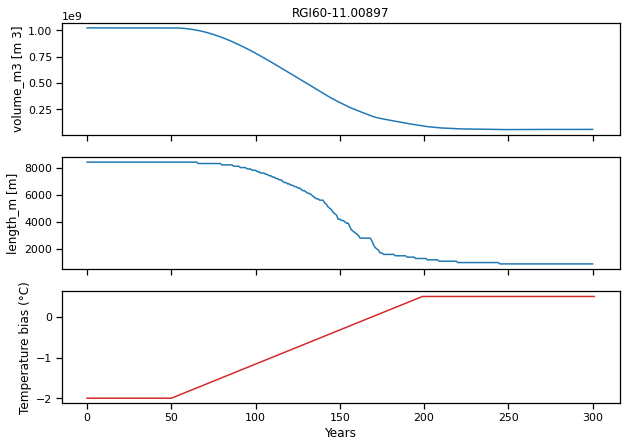

In [18]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 7), sharex=True)
ds.volume_m3.plot(ax=axs[0]);
ds.length_m.plot(ax=axs[1]);
temp_bias_ts.plot(ax=axs[2], c='C3');
axs[0].set_xlabel(''); axs[0].set_title(f'{rgi_id}'); axs[1].set_xlabel(''); axs[2].set_xlabel('Years'); axs[2].set_ylabel('Temperature bias (°C)');

In this scenario, the glacier would melt almost entirely (it looses about 90% of its volume). Note also that the glacier continues to adjust after the temperature has stabilized. What are the implications for downstream runoff?

### Annual runoff

As glaciers retreat, they contribute to sea-level rise (visit the [World Glaciers Explorer](https://edu.oggm.org/en/latest/explorer.html) OGGM-Edu app for more information!). This is not what we are interested in here. Indeed, they will also have important local impacts: in this notebook, we will have a look at their impact on streamflow.  

Let's take a look at some of the hydrological outputs computed by OGGM. We start by creating a pandas DataFrame of all "1D" (annual) variables in the output dataset:

In [19]:
sel_vars = [v for v in ds.variables if 'month_2d' not in ds[v].dims]
df_annual = ds[sel_vars].to_dataframe()

Then we can select the hydrological varialbes and sum them to get the total annual runoff:

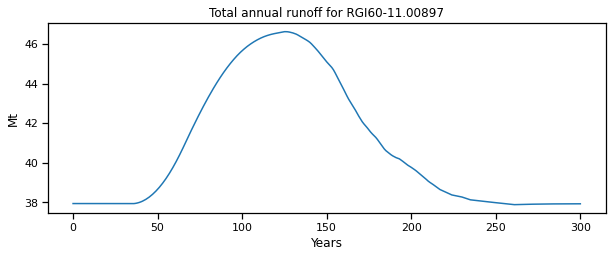

In [20]:
# Select only the runoff variables
runoff_vars = ['melt_off_glacier', 'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier']
# Convert them to megatonnes (instead of kg)
df_runoff = df_annual[runoff_vars] * 1e-9
# We smooth the output, which is otherwize noisy because of area discretization
df_runoff = df_runoff.rolling(31, center=True, min_periods=1).mean()
fig, ax = plt.subplots(figsize=(10, 3.5), sharex=True)
df_runoff.sum(axis=1).plot(ax=ax);
plt.ylabel('Mt'); plt.xlabel('Years'); plt.title(f'Total annual runoff for {rgi_id}');

The hydrological variables are computed on the largest possible area that was covered by glacier ice during the simulation. This is equivalent to the runoff that would be measured at a fixed-gauge hydrological station at the glacier terminus.

The total annual runoff consists of the following components:
- melt off-glacier: snow melt on areas that are now glacier free (i.e. 0 in the year of largest glacier extent, in this example at the start of the simulation)
- melt on-glacier: ice + seasonal snow melt on the glacier
- liquid precipitaton on- and off-glacier (the latter being zero at the year of largest glacial extent, in this example at start of the simulation)

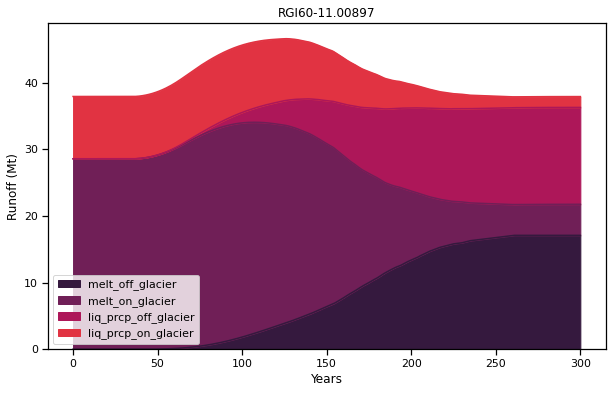

In [21]:
f, ax = plt.subplots(figsize=(10, 6));
df_runoff.plot.area(ax=ax, color=sns.color_palette('rocket')); plt.xlabel('Years'); plt.ylabel('Runoff (Mt)'); plt.title(rgi_id);

The glacier length and volume decrease from year 50 onwards until about year 250 - this is the **glacier retreat** phase. Afterwards, length and volume stabilize at a constant value indicating that the glacier has **reached equilibrium**. Now study the graph above and it's four main components.

**Questions to address:**
- When is "peak water" reached? Does this have anything to do with a change in the temperature trend itself? If not, what is the reason for "peak water" to occur?
- Verify that the total fixed-gauge runoff (remember what this means?) is the same at the beginning and the end of the simulation. Why is that so? What changed in between?
- The temperature stabilizes at year 200, yet all hydrological variables continue to change after that. What is happening there?
- What is the contribution of liquid precipitation at the beginning and the end of the simulation? What changed?
- Can you verify that the net glacier contribution to runoff (i.e. - $\Delta M / \Delta t$ is zero at the beginning and the end of the simulation and positive in between? Why do we expect this behavior?

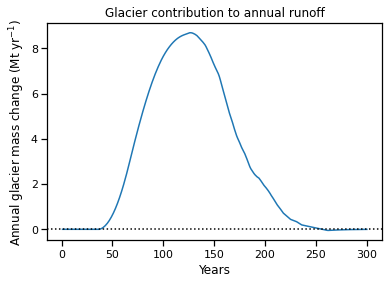

In [22]:
# Solution of the last question above
glacier_mass = ds.volume_m3.to_series() * oggm.cfg.PARAMS['ice_density'] * 1e-9  # In Megatonnes, Mt
glacier_mass = glacier_mass.rolling(31, center=True, min_periods=1).mean()
(- glacier_mass.diff()).plot()
plt.axhline(y=0, color='k', ls=':')
plt.ylabel('Annual glacier mass change (Mt yr$^{-1}$)')
plt.xlabel('Years'); plt.title('Glacier contribution to annual runoff');

### Monthly runoff

The "2D" variables contain the same hydrological data, but at monthly resolution (dimensions [time, month]). For example, monthly runoff can be computed the 
as:

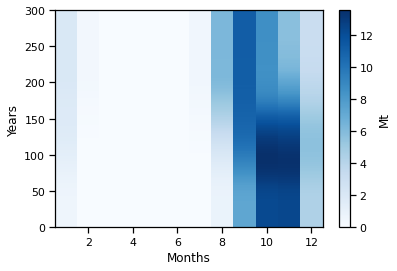

In [23]:
# Select only the runoff variables and convert them to megatonnes (instead of kg)
monthly_runoff = ds['melt_off_glacier_monthly'] + ds['melt_on_glacier_monthly'] + ds['liq_prcp_off_glacier_monthly'] + ds['liq_prcp_on_glacier_monthly']
monthly_runoff = monthly_runoff.rolling(time=31, center=True, min_periods=1).mean() * 1e-9
monthly_runoff.clip(0).plot(cmap='Blues', cbar_kwargs={'label': 'Mt'}); plt.xlabel('Months'); plt.ylabel('Years');

But be aware, something is a bit wrong with this plot (some of you may have noticed: maximum melt happens in Fall, which is unusual): that's because the OGGM coordinates are hydrological months - let's make this better:

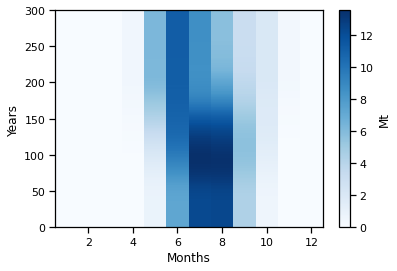

In [24]:
# This should work in both hemispheres maybe?
ds_roll = ds.roll(month_2d=ds['calendar_month_2d'].data[0] - 1, roll_coords=True)
ds_roll['month_2d'] = ds_roll['calendar_month_2d']

# Select only the runoff variables and convert them to megatonnes (instead of kg)
monthly_runoff = ds_roll['melt_off_glacier_monthly'] + ds_roll['melt_on_glacier_monthly'] + ds_roll['liq_prcp_off_glacier_monthly'] + ds_roll['liq_prcp_on_glacier_monthly']
monthly_runoff = monthly_runoff.rolling(time=31, center=True, min_periods=1).mean() * 1e-9
monthly_runoff.clip(0).plot(cmap='Blues', cbar_kwargs={'label': 'Mt'}); plt.xlabel('Months'); plt.ylabel('Years');

As we can see, the runoff is approximately zero during the winter months, while relatively high during the summer months. 

Now let's compare the actual runoff to total precipitation over the basin:

In [25]:
# Compute total precipitation (Snow + Liquid)
tot_precip = ds_roll['liq_prcp_off_glacier_monthly'] + ds_roll['liq_prcp_on_glacier_monthly'] + ds_roll['snowfall_off_glacier_monthly'] + ds_roll['snowfall_on_glacier_monthly']
tot_precip *= 1e-9  # in Mt

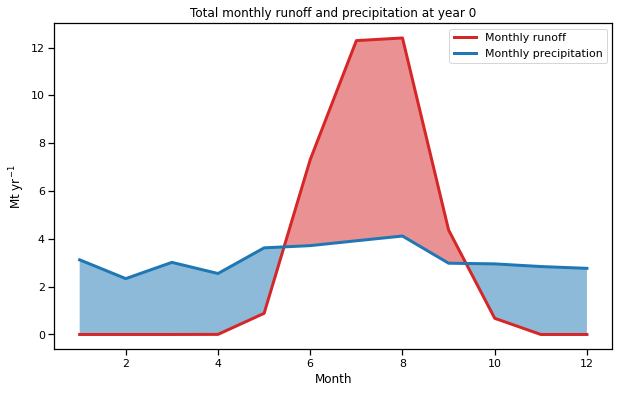

In [26]:
# Plot these data at year 0
yr = 0
r = monthly_runoff.sel(time=yr)
p = tot_precip.sel(time=yr)

f, ax = plt.subplots(figsize=(10, 6));
r.plot(ax=ax, color='C3', label='Monthly runoff', linewidth=3);
p.plot(ax=ax, color='C0', label='Monthly precipitation', linewidth=3);
ax.fill_between(r.month_2d, r, p, where=(p >= r), facecolor='C0', interpolate=True, alpha=0.5)
ax.fill_between(r.month_2d, r, p, where=(r > p), facecolor='C3', interpolate=True, alpha=0.5)
plt.ylabel('Mt yr$^{-1}$'); plt.legend(loc='best');
plt.xlabel('Month'); plt.title(f'Total monthly runoff and precipitation at year {yr}');

At the begining of the simulation, the glacier is in equilibrium and its annual contribution to runoff is zero. In fact, this means that the blue area in the plot above is equal to the red area: **the glaciated basin releases water during the summer, that accumulated in form of snow in the winter months**.

In this region, precipitation is relatively constant throughout the year. **Discuss what the implications could be in other climates of the world, in particular in climates with a strong seasonality of precipitation.**

Now let's have a look at the seasonal change in runoff with time:

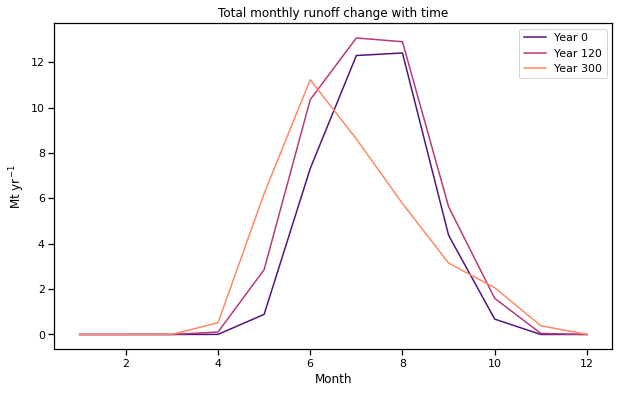

In [27]:
f, ax = plt.subplots(figsize=(10, 6));
cmap = sns.color_palette('magma', 3)
for i, yr in enumerate([0, 120, 300]):
    monthly_runoff.sel(time=yr).plot(ax=ax, color=cmap[i], label=f'Year {yr}')
plt.ylabel('Mt yr$^{-1}$'); plt.legend(loc='best');
plt.xlabel('Month'); plt.title('Total monthly runoff change with time');

**Questions to explore:**
- verify that the annual runoff is the same at year 0 than at year 300. What changed in between?
- what is responsible for the switch from summer melt to spring melt?
- how does the runoff change at "peak water" (approx. year 120)?
- discuss the implications of this shift in seasonality for Hintereisferner and for other regions of the world.

**Now repeat this notebook (ideally by copying it first) with other regions of the world, where climate might be very different. You can also change the parameters of the simulations: what happens when the temperature change is larger/faster, or smaller/slower? What are the implications for "peak water"?**

## Wrapping up

Now let's conclude this notebook by reproducing the this now famous plot by [Huss & Hock (2018)](https://www.nature.com/articles/s41558-017-0049-x) with our data.

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41558-017-0049-x/MediaObjects/41558_2017_49_Fig1_HTML.jpg" width="40%">

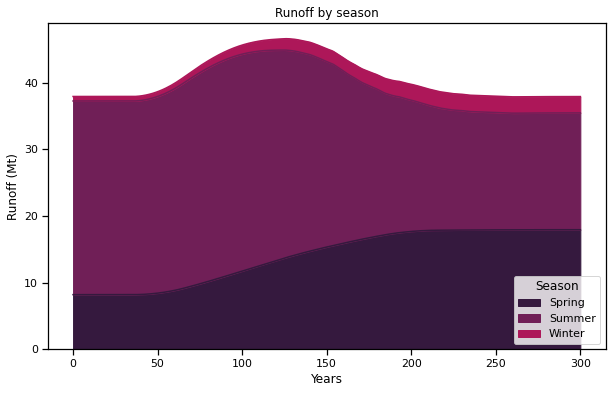

In [28]:
# Make a dataframe out of the xarray dataset for simplicity
df_monthly_runoff = pd.DataFrame(monthly_runoff.data, index=ds.time, columns=monthly_runoff.month_2d)

# Create new columns for each season
df_monthly_runoff['Spring'] = df_monthly_runoff[[4, 5, 6]].sum(axis=1)
df_monthly_runoff['Summer'] = df_monthly_runoff[[7, 8, 9]].sum(axis=1)
df_monthly_runoff['Winter'] = df_monthly_runoff[[10, 11, 12, 1, 2, 3]].sum(axis=1)
df_monthly_runoff.columns.name = 'Season'

# Plot it
f, ax = plt.subplots(figsize=(10, 6));
df_monthly_runoff[['Spring', 'Summer', 'Winter']].plot.area(ax=ax, color=sns.color_palette('rocket'));
plt.xlabel('Years'); plt.ylabel('Runoff (Mt)'); plt.title('Runoff by season');

And now the actual plot:

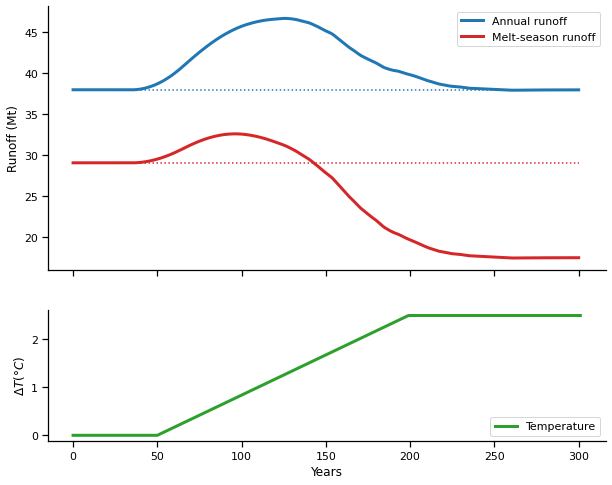

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(10, 8), sharex=True)

p1 = df_monthly_runoff[['Spring', 'Summer', 'Winter']].sum(axis=1)
p2 = df_monthly_runoff['Summer']
p1.plot(ax=ax1, color='C0', label='Annual runoff', linewidth=3)
p2.plot(ax=ax1, color='C3', label='Melt-season runoff', linewidth=3);
ax1.hlines([p1.loc[0], p2.loc[0]], 0, 300, color=['C0', 'C3'], linestyle=[':']);
ax1.legend(); ax1.set_xlabel(''); ax1.set_ylabel('Runoff (Mt)');

(temp_bias_ts + 2).plot(ax=ax2, color='C2', label='Temperature', linewidth=3);
ax2.legend(loc='lower right'); ax2.set_xlabel('Years'); ax2.set_ylabel('$\Delta T (°C)$');
sns.despine();

## Take home points

- Glaciers in equilibrium are *not* net water resources: they gain as much mass as they release
- However, they have a seasonal buffer role, releasing water during the melt months
- When glaciers melt, they become net water resources. "Peak water" is the point in time when glacier melt supply reaches its maximum, i.e. when the maximum runoff occurs.

## References 

- Huss, M. and Hock, R.: Global-scale hydrological response to future glacier mass loss, Nat. Clim. Chang., 8(2), 135–140, [doi:10.1038/s41558-017-0049-x](https://doi.org/10.1038/s41558-017-0049-x), 2018.
- A [recent blog post](https://blogs.egu.eu/divisions/cr/2021/03/05/glaciers-water-supply-climate-change/) about the role of glaciers in the hydrological cycle

## What's next?

[Back to the table of contents](../welcome.ipynb)